# Deep Learning CNN for Fashion-MNIST Clothing Classification
The Fashion-MNIST clothing classification problem is a new standard dataset used in computer vision and deep learning.


### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

### Load dataset

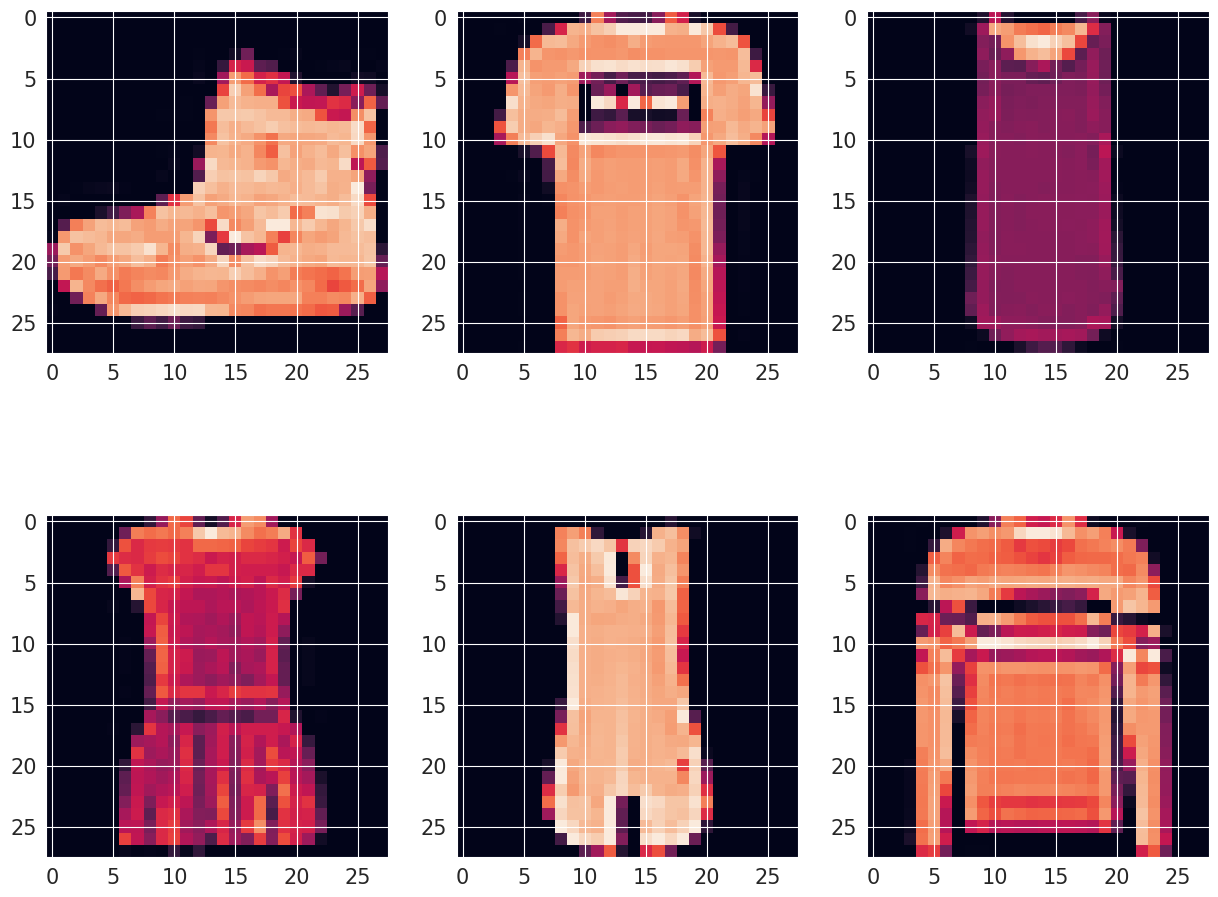

In [15]:
fashion_mnist=keras.datasets.fashion_mnist
(X_trainfull,y_trainfull),(X_testfull,y_testfull)=fashion_mnist.load_data()
plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
j=1
for i in [0,1,2,3,4,5]:
    plt.subplot(2,3,j)
    plt.imshow(X_trainfull[i])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    j+=1
plt.show()

In [16]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
            'Bag','Ankle boot']
for i in [0,1,2,3,4,5]:
    print(class_names[y_trainfull[i]])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover


### Data Normalisation


In [18]:
X_train_n=X_trainfull/255.0
X_test_n=X_testfull/255.0

### Split the data into train/Validation/test datasets.


In [19]:
print('Shape of X_train : ',X_train_n.shape)
print('Shape of y_train : ',y_trainfull.shape)
print('Shape of X_test : ',X_test_n.shape)
print('Shape of y_test : ',y_testfull.shape,'\n')
X_train=np.expand_dims(X_train_n,-1)
print('Reshaped datasets: ','\n')
print('Dimension of training data : ',X_train.ndim)
X_test=np.expand_dims(X_test_n,-1)
print('Dimension of testing data : ',X_test.ndim,'\n')
print('Updated shapes of Xtrain and Xtest datasets: ','\n')
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test : ',X_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of y_train :  (60000,)
Shape of X_test :  (10000, 28, 28)
Shape of y_test :  (10000,) 

Reshaped datasets:  

Dimension of training data :  4
Dimension of testing data :  4 

Updated shapes of Xtrain and Xtest datasets:  

Shape of X_train :  (60000, 28, 28, 1)
Shape of X_test :  (10000, 28, 28, 1)


In [20]:
X_train_new,X_valid=X_train[5000:],X_train[:5000]
y_train,y_valid=y_trainfull[5000:],y_trainfull[:5000]
print('Shape of X_train : ',X_train_new.shape)
print('Shape of X_valid : ',X_valid.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_valid : ',y_valid.shape)

Shape of X_train :  (55000, 28, 28, 1)
Shape of X_valid :  (5000, 28, 28, 1)
Shape of y_train :  (55000,)
Shape of y_valid :  (5000,)


### Creating a CNN model:


In [21]:
np.random.seed(42)
tf.random.set_seed(42)
cnn_model=keras.models.Sequential()
cnn_model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',
                                 activation='relu',input_shape=(28,28,1)))
cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(units=300,activation='relu'))
cnn_model.add(keras.layers.Dense(units=100,activation='relu'))
cnn_model.add(keras.layers.Dense(units=10,activation='softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

### Compiling and Training the Convolutional Neural Network model:


In [23]:
cnn_model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_history=cnn_model.fit(X_train_new,y_train,epochs=10,
                            validation_data=(X_valid,y_valid))
print(model_history.params,'\n')
print(model_history.history)

Epoch 1/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.4594 - accuracy: 0.8329 - val_loss: 0.4295 - val_accuracy: 0.8478
Epoch 2/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.4104 - accuracy: 0.8511 - val_loss: 0.3785 - val_accuracy: 0.8670
Epoch 3/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3768 - accuracy: 0.8623 - val_loss: 0.5785 - val_accuracy: 0.7860
Epoch 4/10
1719/1719 [==============================] - 55s 32ms/step - loss: 0.3523 - accuracy: 0.8735 - val_loss: 0.3353 - val_accuracy: 0.8816
Epoch 5/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.3330 - accuracy: 0.8783 - val_loss: 0.3288 - val_accuracy: 0.8838
Epoch 6/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.3134 - accuracy: 0.8859 - val_loss: 0.3120 - val_accuracy: 0.8894
Epoch 7/10
1719/1719 [==============================] - 56s 32ms/step - loss: 0.2992 - accuracy: 0.8911 - val_loss: 0.3192 -

### Plotting the loss and accuracy against epoch:


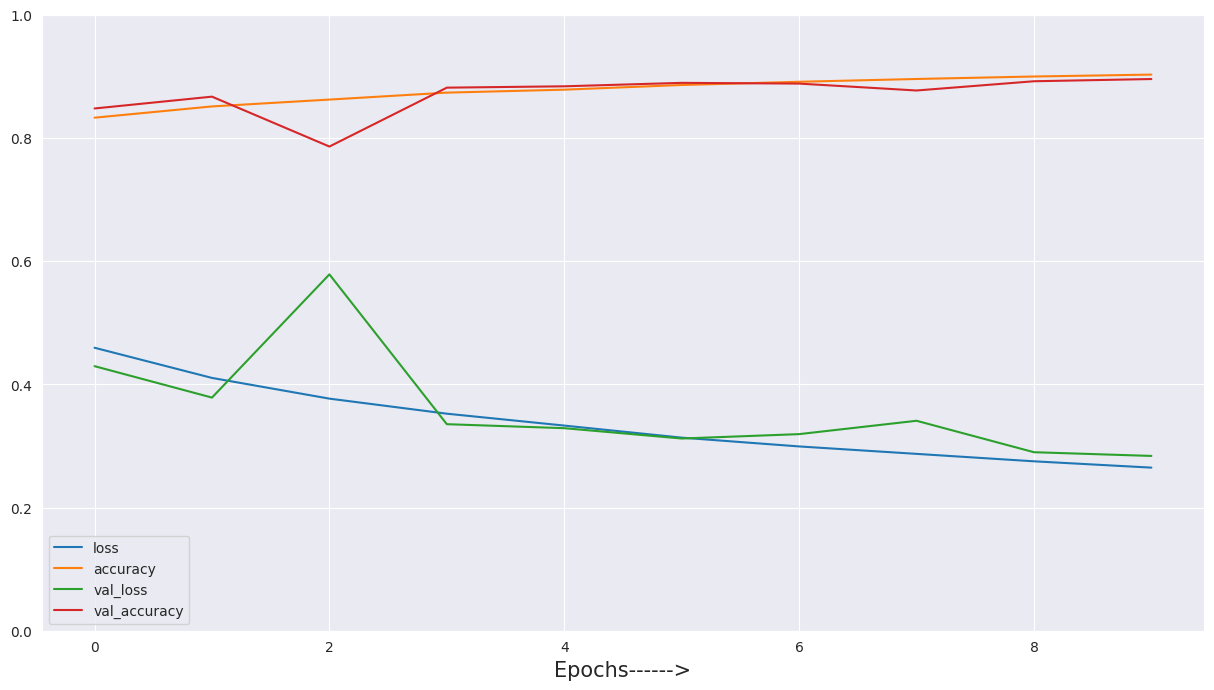

In [24]:
sns.set_style('darkgrid')
pd.DataFrame(model_history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs------>',fontsize=15)
plt.show()

### Evaluate

In [25]:
cnn_model.evaluate(X_test,y_testfull)


313/313 [==============================] - 4s 13ms/step - loss: 0.3054 - accuracy: 0.8853


[0.30537232756614685, 0.8852999806404114]

### Prediction

In [26]:
X_newcnn=X_test[:6]
y_predcnn=cnn_model.predict(X_newcnn)
y_predcnn.round(2)
y_predcnn_class=np.argmax(cnn_model.predict(X_newcnn), axis=-1)
print('Class labels for unseen data : ',y_predcnn_class,'\n')
print(np.array(class_names)[y_predcnn_class])

1/1 [==============================] - 0s 23ms/step
Class labels for unseen data :  [9 2 1 1 6 1] 

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


### Plot

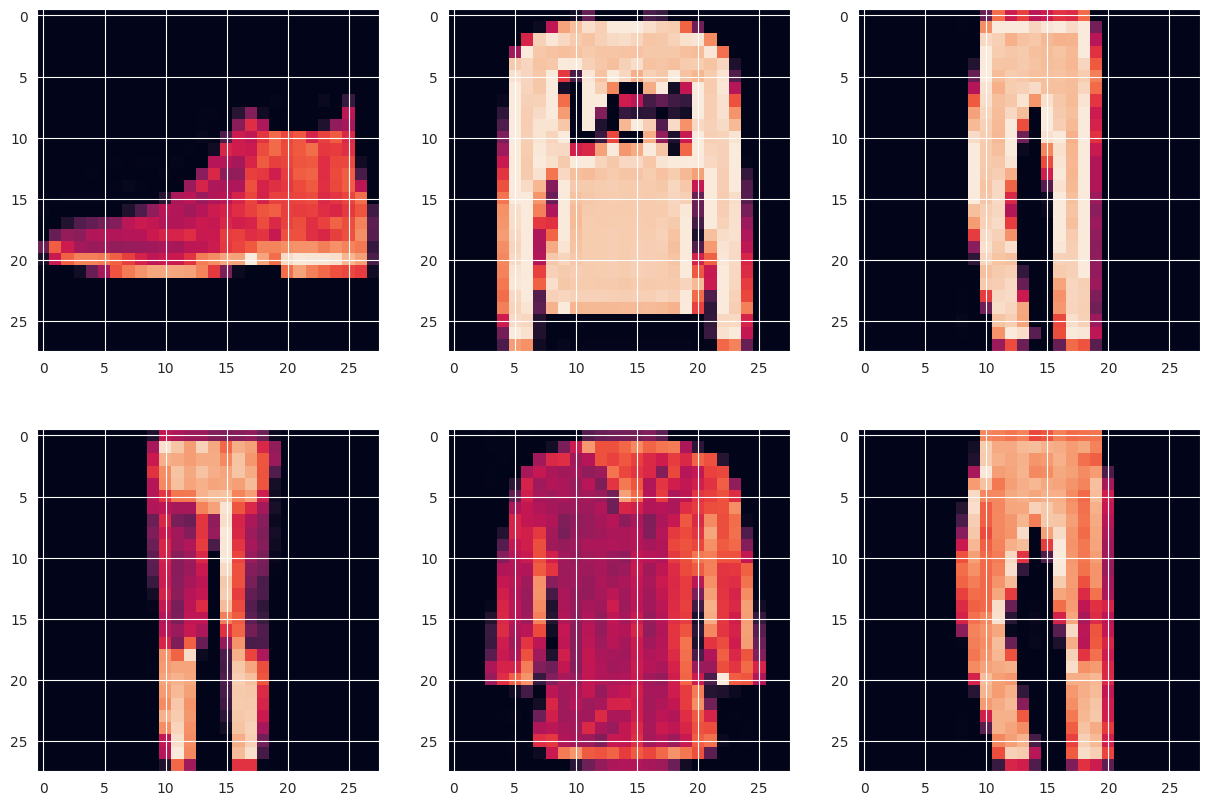

Images classified as : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


In [36]:
plt.figure(figsize=(15,10))
j=1
for i in [0,1,2,3,4,5]:
    plt.subplot(2,3,j)
    plt.imshow(X_newcnn[i])
    j+=1
plt.show()
print('Images classified as :',np.array(class_names)[y_predcnn_class])